# Теоретическая часть:

<b>1. Вопрос:</b> 
Дайте определение ARPPU. В результате изменений в продукте ARPPU
снизился. Это хорошо или плохо? Отвечайте развернуто.

<b>Ответ:</b> 

ARPPU - это доля прибыли, который приносит один платяжий пользователь.


Рассчитывается по формуле: revenue / количество платяжих пользоватлей.

Возможны два варианта:
- часть платящей аудитории откололась, выручка уменьшилась, следовательно, уменьшилась и метрика,
- мы могли привлечь аудиторию, например, промокодом, или скидкой на оплату сервиса. В этом случае, аудитория увеличится, но выручка уменьшится (или останется такой же) и метрика снизится.

Первый вариант - плохой, второй - хороший, поэтому нельзя ответить однозначно, слишком мало данных. 

Стоит рассчитать arppu за более длительный период или оценить изменения при помощи других метрик.

<b>2. Вопрос:</b>
Предположим, что в результате обновления дизайна продукта вы наблюдаете
увеличение среднего времени нахождения пользователей в приложении, но
уровень конверсии в покупку снизился. Как вы будете анализировать данное
изменение и какие рекомендации вы предложите команде продукта?

<b>Ответ:</b> 

Нам понадобится воронка конверсии: с помощью нее мы сможем отследить момент, когда пользователь откалывается и не совершает покупку. 

Возможно, своими действиями мы изменили привычный алгоритм взаимодействия пользователя с продуктом и (например):
- пользователь не может по какой-то причине добавить товар в корзину и оплатить его,
- он стал больше времени тратить на изучение описания товара 
- или испытывает другие трудности, взаимодействуя с сайтом.

Рекомендации:
- вернуть все, как было и надеятся, что небольшая часть аудитории успела повзаимодействовать с новой версией,
- в дальнейшем - тестировать новую версию продукта на небольшой части аудитории.

# Практическая часть:

## Описание задания:

В базе представлены данные об активности пользователей в обучающем игровом приложении. 

Рассчитайте следующие метрики:
- Retention и время, которое ученики проводят в приложении.
- Как ученики переходят с уровня на уровень.
- Метрики монетизации для всей когорты
- Где ученики совершают больше всего платежей?
- Где ученики совершают первые платежи?


Какие выводы вы можете сделать из расчетов:
- Выберете 3-4 метрики, которые следует отслеживать в первую очередь?
- Какие еще метрики следует отслеживать?
- Какие данные стоит собирать дополнительно к уже собираемым, что бы
рассчитать предлагаемые тобою метрики?

## Описание данных:

<img src='https://e.radikal.host/2023/06/07/SNIMOK26f12a265a8760df.png' width=600>

## Ход работы:

[1. Импорт библиотек. Загрузка данных. Общая информация.](#import)

[2. Расчет метрик.](#metrics)

[2.1. Рассчитайте Retention и время, которое ученики проводят в приложении.](#retention)

[2.2. Как ученики переходят с уровня на уровень?](#level_to_level)

[2.3. Метрики монетизации для всей когорты:](#metrics_cohort)

[- ARPU](#arpu)

[- LTV](#ltv)

[- Churn rate](#churn_rate)

[2.4. Где ученики совершают больше всего платежей?](#max_payments)

[2.5. Где ученики совершают первые платежи?](#first_payments)

[Общий вывод](#conclusion)

[Рекомендации - дополнительные метрики](#recommendations)

<a id="import"> </a>
# 1. Импорт библиотек. Загрузка данных. Общая информация.

In [1]:
! pip install pandasql

In [2]:
import pandas as pd
import numpy as np

import pandasql as ps

import matplotlib.pyplot as plt

In [3]:
# загрузка датафреймов

levels = pd.read_csv('levels.csv', index_col=0)

payments = pd.read_csv('payments.csv', index_col=0)

sessions = pd.read_csv('sessions.csv', index_col=0)

users = pd.read_csv('users.csv', index_col=0)

In [4]:
# общая информация - датафрейм levels

levels.head(3)

,user_id,time,level
0,105194,2023-05-16 08:22:12.799003,2.0
1,105194,2023-05-16 08:26:42.405003,3.0
2,105194,2023-05-16 08:27:12.760003,4.0


In [5]:
levels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130623 entries, 0 to 130629
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  130623 non-null  int64  
 1   time     130623 non-null  object 
 2   level    130623 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ MB


In [6]:
# общая информация - датафрейм payments

payments.head(3)

,user_id,pay_time,amt
1,107907,2023-05-29 17:08:18.890,0.400218
2,510991,2023-05-20 16:55:01.216,0.199608
3,294837,2023-05-19 01:41:55.970,0.199608


In [7]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   699 non-null    int64  
 1   pay_time  699 non-null    object 
 2   amt       699 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.8+ KB


In [8]:
# общая информация - датафрейм sessions

sessions.head(3)

,user_id,close_time,open_time
0,875013,2023-05-16 05:17:59,2023-05-16 05:06:09
1,138278,2023-05-16 06:48:24,2023-05-16 06:47:34
2,138278,2023-05-18 01:44:40,2023-05-18 01:07:58


In [9]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358004 entries, 0 to 358033
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     358004 non-null  int64 
 1   close_time  358004 non-null  object
 2   open_time   358004 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.9+ MB


In [10]:
# общая информация - датафрейм users

users.head(3)

,user_id,reg_time
0,439127,2023-05-16 15:47:56.024
1,646681,2023-05-16 16:32:35.495
2,35136,2023-05-16 16:50:14.571


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31114 entries, 0 to 31114
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   31114 non-null  int64 
 1   reg_time  31114 non-null  object
dtypes: int64(1), object(1)
memory usage: 729.2+ KB


In [12]:
# проверка на явные и неявные дубликаты

print('levels - явные дубликаты:', levels.duplicated().sum(),
    'неявные дубликаты:', levels[levels.duplicated(keep=False)].shape[0])


print('payments - явные дубликаты:', payments.duplicated().sum(), 
    'неявные дубликаты:', payments[payments.duplicated(keep=False)].shape[0])


print('sessions - явные дубликаты:', sessions.duplicated().sum(),
    'неявные дубликаты:', sessions[sessions.duplicated(keep=False)].shape[0])


print('users - явные дубликаты:', users.duplicated().sum(),
    'неявные дубликаты:', users[users.duplicated(keep=False)].shape[0])

levels - явные дубликаты: 0 неявные дубликаты: 0
payments - явные дубликаты: 0 неявные дубликаты: 0
sessions - явные дубликаты: 0 неявные дубликаты: 0
users - явные дубликаты: 0 неявные дубликаты: 0


In [13]:
levels = levels.drop_duplicates()

payments = payments.drop_duplicates()

sessions = sessions.drop_duplicates()

users = users.drop_duplicates()

В нашем распоряжении четыре датафрейма:
- датафрейм levels - 130  623 строк,

- датафрейм payments - 699 строк,

- датафрейм sessions - 358 004 строк,

- датафрейм users - 31 114 строк.

В каждом из них:
- по 3 столбца,
- пропущенных значений - нет,
- явных и неявных дубликатов - нет.


<a id="metrics"> </a>

# 2. Расчет метрик.

In [14]:
# минимальные и максимальные значения времени в users['reg_time']

users['reg_time'].agg(['min', 'max'])

min    2023-05-11 02:01:36.784
max    2023-05-21 01:58:09.459
Name: reg_time, dtype: object

In [15]:
# минимальные и максимальные значения времени в payments['pay_time']

payments['pay_time'].agg(['min', 'max'])

min    2023-05-12 11:01:31.670
max    2023-05-30 04:11:03.590
Name: pay_time, dtype: object

In [16]:
# минимальные и максимальные значения времени в sessions['open_time'] и sessions['close_time']

sessions[['open_time', 'close_time']].agg(['min', 'max'])

,open_time,close_time
min,2023-05-11 02:01:37,2023-05-11 02:05:06
max,2023-05-30 17:09:26,2023-05-30 17:18:17


In [17]:
sessions['open_date'] = pd.to_datetime(sessions['open_time']).dt.date
sessions['close_date'] = pd.to_datetime(sessions['close_time']).dt.date

In [18]:
# количество сессий, не закрытых в тот же день

sessions[sessions['open_date'] != sessions['close_date']].shape[0]

2640

<a id="retention"> </a>
# 2.1. Рассчитайте Retention и время, которое ученики проводят в приложении.

In [19]:
users['reg_date'] = pd.to_datetime(users['reg_time']).dt.date

In [22]:
users_sessions = users.merge(sessions, on='user_id', how='left')
users_sessions.head(5)

,user_id,reg_time,reg_date,close_time,open_time,open_date,close_date
0,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-16 16:55:15,2023-05-16 15:47:56,2023-05-16,2023-05-16
1,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 02:52:27,2023-05-17 02:16:58,2023-05-17,2023-05-17
2,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 03:35:25,2023-05-17 03:18:01,2023-05-17,2023-05-17
3,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 04:40:43,2023-05-17 04:25:57,2023-05-17,2023-05-17
4,439127,2023-05-16 15:47:56.024,2023-05-16,2023-05-17 10:33:00,2023-05-17 10:22:22,2023-05-17,2023-05-17


In [23]:
users_sessions['life_time'] = (users_sessions['open_date'] - users_sessions['reg_date']).dt.days

In [24]:
users_sessions = users_sessions[users_sessions['life_time'] != -1]

In [55]:
first_session = users_sessions.groupby(['user_id', 'life_time']).first().reset_index()

In [59]:
# посчитаем retention в процентах

retention = pd.crosstab(first_session['reg_date'], first_session['life_time'])\
              .apply(lambda x: round(x / x[0] * 100, 2), axis=1)

retention

life_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
reg_date,,,,,,,,,,,
2023-05-11,100.0,45.24,36.89,30.26,26.51,22.77,23.92,24.21,21.04,18.73,5.76
2023-05-12,100.0,44.25,34.72,28.85,22.25,23.23,22.00,20.78,18.58,15.65,6.85
2023-05-13,100.0,40.73,30.73,26.91,23.64,20.73,20.18,18.00,18.00,16.18,6.00
2023-05-14,100.0,30.78,21.71,20.13,17.55,16.47,15.89,15.81,12.48,11.90,4.49
2023-05-15,100.0,34.80,25.72,21.80,18.86,17.54,16.26,15.22,14.34,13.64,7.43
2023-05-16,100.0,32.85,24.06,20.49,18.27,16.27,15.19,14.50,14.18,13.33,3.74
2023-05-17,100.0,47.44,36.57,31.29,27.89,25.66,23.57,23.02,21.49,20.22,7.21
2023-05-18,100.0,50.97,40.26,35.47,31.00,28.06,26.54,25.88,24.73,22.44,3.59
2023-05-19,100.0,45.85,37.19,32.36,28.16,28.40,26.05,25.12,22.22,20.73,8.04


In [60]:
users_sessions['close_time'] = pd.to_datetime(users_sessions['close_time'])
users_sessions['open_time'] = pd.to_datetime(users_sessions['open_time'])

In [61]:
# разница в минутах между началом и концом сессии, округленная до 2 знаков

users_sessions['session_minutes'] = round((users_sessions['close_time'] - 
                                           users_sessions['open_time']).dt.total_seconds() / 60,2)

In [62]:
users_sessions['session_minutes'].describe()

count    358003.000000
mean         12.510369
std          19.519481
min           0.000000
25%           2.600000
50%           6.980000
75%          15.330000
max        1365.270000
Name: session_minutes, dtype: float64

In [63]:
users_sessions['session_minutes'].quantile(q=0.95)

41.83

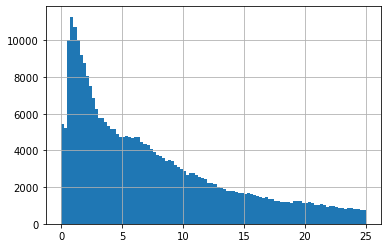

In [64]:
users_sessions[users_sessions['session_minutes'] <= 25]['session_minutes'].hist(bins=100);

В группах от 16 и 18 мая самый высокий процент удержания на 10 день.

Среднее время пребывания в прилолжении - ~ 7 минут.

В имеющихся данных есть аномально длинные сессии (до 1 365 минут), 5% сессий длилось больше 42 минут. Сессий не закрытых в течении того же дня - 2 640.

Возможно, приложение не разлогинивает пользователя автоматически без активности и продолжает работать в фоновом режиме.

<a id="level_to_level"> </a>
# 2.2. Как ученики переходят с уровня на уровень?

In [65]:
levels['time'] = pd.to_datetime(levels['time'])

In [66]:
levels = levels.sort_values(['user_id', 'time', 'level'])

In [88]:
# получим данные о моменте получения предыдущих уровней
# и разницу во времени между текущим уровнем и предыдущим

sql_query = '''with t as(SELECT *, 
                LEAD (time) OVER (PARTITION BY user_id ORDER BY time) as time_next_level,
                LAG (time) OVER (PARTITION BY user_id ORDER BY time) as time_previous_level
                FROM levels)
                
                SELECT *,
                (strftime('%s',time) - strftime('%s',time_previous_level)) / 60 as time_diff_minutes
                FROM t'''

In [89]:
levels_time_diff = ps.sqldf(sql_query)

levels_time_diff.head(5)

,user_id,time,level,time_next_level,time_previous_level,time_diff_minutes
0,58,2023-05-16 08:35:01.126003,2.0,2023-05-16 08:40:21.106003,None,NaN
1,58,2023-05-16 08:40:21.106003,3.0,None,2023-05-16 08:35:01.126003,5.0
2,95,2023-05-16 21:14:37.314003,2.0,None,None,NaN
3,109,2023-05-16 04:42:03.809003,2.0,2023-05-16 04:44:28.997001,None,NaN
4,109,2023-05-16 04:44:28.997001,3.0,None,2023-05-16 04:42:03.809003,2.0


В столбце time_diff_minutes хранится время в минутах, характеризующееся сколько времени пользователю понадобилось для перехода на текущий уровень.

In [90]:
levels_time_diff['time_diff_minutes'].agg(['median', 'mean'])

median     12.000000
mean      745.211053
Name: time_diff_minutes, dtype: float64

In [91]:
# построим сводные таблицы, в которых хранится среднее и медианное время, пребывания на уровне

levels_time_diff_groupby = levels_time_diff.groupby('level')['time_diff_minutes'].agg(['median', 'mean']).reset_index()

levels_time_diff_groupby['level'] = levels_time_diff_groupby['level'].astype('int').astype('str')

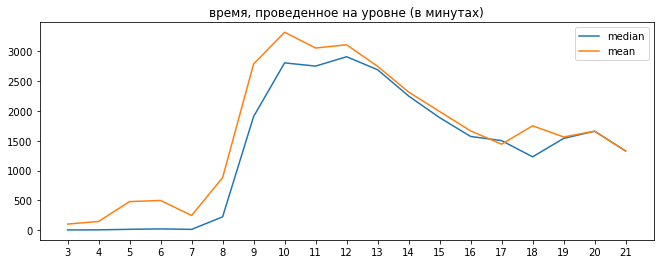

In [92]:
plt.figure(figsize=(11,4))
plt.plot(levels_time_diff_groupby['level'], levels_time_diff_groupby['median'], label='median')
plt.plot(levels_time_diff_groupby['level'], levels_time_diff_groupby['mean'], label='mean')
plt.title('время, проведенное на уровне (в минутах)')
plt.legend()
plt.show();

Линии среднего и медианного значения похожи.

На отметке 7 - 12 уровней мы наблюдаем плато, потом спад.

Предполагаем два варината:
- либо пользователи, столкнувшиеся с трудностями покидают игру и остаются самые сообразительные,
- либо пользователи покупают какой-либо бустер (или подсказки) для более легкого прохождения.

In [93]:
levels['level'].value_counts()

2.0     25534
3.0     21366
4.0     17862
5.0     14438
6.0     12729
7.0     12083
8.0     10327
9.0      6598
10.0     4034
11.0     2636
12.0     1553
13.0      795
14.0      384
15.0      173
16.0       74
17.0       22
18.0        7
19.0        5
20.0        2
21.0        1
Name: level, dtype: int64

Первое предположение частично подтверждается - начиная с 9 уровня идет спад количества пользователей.

<a id="metrics_cohort"> </a>

# 2.3. Метрики монетизации для всей когорты

In [94]:
sql_query = '''SELECT 
               p.user_id, p.pay_time, p.amt,
               u.reg_time,
               s.open_time, s.close_time
               FROM payments as p
               
               INNER JOIN users as u on p.user_id = u.user_id
               INNER JOIN sessions as s on p.user_id = s.user_id
               WHERE p.pay_time BETWEEN s.open_time AND s.close_time'''

In [95]:
payments_user_session = ps.sqldf(sql_query)

In [96]:
payments_user_session['reg_date'] = pd.to_datetime(payments_user_session['reg_time']).dt.date

payments_user_session['open_date'] = pd.to_datetime(payments_user_session['open_time']).dt.date
payments_user_session['close_date'] = pd.to_datetime(payments_user_session['close_time']).dt.date

In [97]:
payments_user_session['life_time'] = (payments_user_session['open_date'] - payments_user_session['reg_date']).dt.days

<a id="arpu"> </a>
# ARPU = Доход / Количество клиентов.

In [98]:
simple_arpu = payments_user_session['amt'].sum() / payments_user_session['user_id'].count()
print('один пользователь принес в среднем:', round(simple_arpu, 2))

один пользователь принес в среднем: 0.72


<a id="ltv"> </a>

# LTV - пожизненная ценность клиента.

самая простая формула: LTV = Lifetime x ARPU

In [99]:
# найдем средний период активности

payments_user_session['life_time'].describe()

count    696.000000
mean       2.827586
std        2.747218
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       10.000000
Name: life_time, dtype: float64

In [100]:
print('за весь период один пользователь принес в среднем:', round(payments_user_session['life_time'].mean() * simple_arpu, 2))

за весь период один пользователь принес в среднем: 2.03


<a id="churn_rate"> </a>

# Churn rate - коэффициент оттока.

In [101]:
churn_rate = pd.crosstab(first_session['reg_date'], first_session['life_time'])

churn_rate = round(1 - churn_rate / churn_rate.shift(1, axis=1), 2).fillna(0)

churn_rate

life_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
reg_date,,,,,,,,,,,
2023-05-11,0.0,0.55,0.18,0.18,0.12,0.14,-0.05,-0.01,0.13,0.11,0.69
2023-05-12,0.0,0.56,0.22,0.17,0.23,-0.04,0.05,0.06,0.11,0.16,0.56
2023-05-13,0.0,0.59,0.25,0.12,0.12,0.12,0.03,0.11,0.00,0.10,0.63
2023-05-14,0.0,0.69,0.29,0.07,0.13,0.06,0.04,0.01,0.21,0.05,0.62
2023-05-15,0.0,0.65,0.26,0.15,0.14,0.07,0.07,0.06,0.06,0.05,0.46
2023-05-16,0.0,0.67,0.27,0.15,0.11,0.11,0.07,0.05,0.02,0.06,0.72
2023-05-17,0.0,0.53,0.23,0.14,0.11,0.08,0.08,0.02,0.07,0.06,0.64
2023-05-18,0.0,0.49,0.21,0.12,0.13,0.10,0.05,0.02,0.04,0.09,0.84
2023-05-19,0.0,0.54,0.19,0.13,0.13,-0.01,0.08,0.04,0.12,0.07,0.61


Один пользователь принес в среднем: 0.72.

Пожизненная ценность клиента - 2.03.

На предыдущем шаге мы выяснили, что у групп от 16 и 18 числа удержание на 10 день самое высокое. Эти группы так же хорошо себя показывают себя в плане коэффициента оттока на 10 день.


<a id="max_payments"> </a>
# 2.4. Где ученики совершают больше всего платежей?

Мне в голову приходит два ответа на вопрос "где совершают больше всего платежей?":
- первый: в какой день от момента регистрации,
- второй: на каких уровнях происходит больше всего платежей.

In [102]:
payments_user_session

,user_id,pay_time,amt,reg_time,open_time,close_time,reg_date,open_date,close_date,life_time
0,107907,2023-05-29 17:08:18.890,0.400218,2023-05-20 20:21:33.916,2023-05-29 16:57:27,2023-05-29 17:47:24,2023-05-20,2023-05-29,2023-05-29,9
1,510991,2023-05-20 16:55:01.216,0.199608,2023-05-19 20:26:36.963,2023-05-20 16:50:04,2023-05-20 17:16:40,2023-05-19,2023-05-20,2023-05-20,1
2,294837,2023-05-19 01:41:55.970,0.199608,2023-05-18 12:54:08.580,2023-05-19 01:02:24,2023-05-19 01:55:22,2023-05-18,2023-05-19,2023-05-19,1
3,644287,2023-05-20 03:01:53.697,0.199608,2023-05-20 01:36:12.306,2023-05-20 03:00:22,2023-05-20 03:21:18,2023-05-20,2023-05-20,2023-05-20,0
4,673424,2023-05-20 03:33:36.918,0.099302,2023-05-18 01:22:31.109,2023-05-20 02:53:33,2023-05-20 03:47:20,2023-05-18,2023-05-20,2023-05-20,2
...,...,...,...,...,...,...,...,...,...,...
691,722621,2023-05-27 19:13:39.445,0.400218,2023-05-20 13:22:59.428,2023-05-27 18:53:26,2023-05-27 19:36:12,2023-05-20,2023-05-27,2023-05-27,7
692,940244,2023-05-19 03:08:36.320,0.400218,2023-05-19 02:53:16.840,2023-05-19 02:53:17,2023-05-19 04:24:00,2023-05-19,2023-05-19,2023-05-19,0
693,895621,2023-05-22 20:50:28.787,3.008157,2023-05-21 01:33:21.206,2023-05-22 20:45:22,2023-05-22 21:30:44,2023-05-21,2023-05-22,2023-05-22,1
694,940244,2023-05-23 15:52:14.721,1.503577,2023-05-19 02:53:16.840,2023-05-23 15:41:23,2023-05-23 17:10:16,2023-05-19,2023-05-23,2023-05-23,4


In [103]:
# ответим на первую часть нашего предположения:

payments_user_session.groupby('life_time')['amt'].agg(['count', 'sum']).round(2)

,count,sum
life_time,,
0,175,145.56
1,137,87.12
2,75,45.76
3,64,34.14
4,64,44.47
5,43,29.75
6,43,32.96
7,32,19.93
8,34,30.16


В первые дни после регистрации пользователи совершают больше всего платежей.

Попробуем связать момент оплаты и момент перехода с уровня на уровень.

Опытным путем я выяснила, что:
- момент оплаты и момент перехода с уровня на уровень не совпадают - обычно с начала происходит переход, потом - оплата с разницей в 5-15 минут;
- у некоторых пользователей в payments есть записи об оплате, но записей о переходе с уровня на уровень - нет (например, пользвоатель 10790: оплата было 29 числа, последняя запись в levels - 28 число). 

Следовательно, объединив эти две таблицы, на выходе мы получим таблицу меньшего размера, чем payments.

In [104]:
# найдем записи, где момент оплаты попадает в промежуток между двумя уровнями

payments_levels_time_diff = payments.merge(levels_time_diff, how='inner', on='user_id')
payments_levels_time_diff

,user_id,pay_time,amt,time,level,time_next_level,time_previous_level,time_diff_minutes
0,107907,2023-05-29 17:08:18.890,0.400218,2023-05-20 20:25:29.712003,2.0,2023-05-20 20:30:14.212003,None,NaN
1,107907,2023-05-29 17:08:18.890,0.400218,2023-05-20 20:30:14.212003,3.0,2023-05-20 20:36:57.733003,2023-05-20 20:25:29.712003,4.0
2,107907,2023-05-29 17:08:18.890,0.400218,2023-05-20 20:36:57.733003,4.0,2023-05-21 16:36:11.744003,2023-05-20 20:30:14.212003,6.0
3,107907,2023-05-29 17:08:18.890,0.400218,2023-05-21 16:36:11.744003,5.0,2023-05-26 17:04:26.843003,2023-05-20 20:36:57.733003,1199.0
4,107907,2023-05-29 17:08:18.890,0.400218,2023-05-26 17:04:26.843003,6.0,2023-05-26 17:20:43.787003,2023-05-21 16:36:11.744003,7228.0
...,...,...,...,...,...,...,...,...
7433,403762,2023-05-18 11:35:46.508,0.199608,2023-05-18 11:34:30.717003,5.0,2023-05-18 11:47:00.405003,2023-05-18 08:16:44.598003,197.0
7434,403762,2023-05-18 11:35:46.508,0.199608,2023-05-18 11:47:00.405003,6.0,2023-05-18 11:56:53.545001,2023-05-18 11:34:30.717003,12.0
7435,403762,2023-05-18 11:35:46.508,0.199608,2023-05-18 11:56:53.545001,7.0,2023-05-18 12:18:01.787004,2023-05-18 11:47:00.405003,9.0
7436,403762,2023-05-18 11:35:46.508,0.199608,2023-05-18 12:18:01.787004,8.0,2023-05-20 04:05:51.135002,2023-05-18 11:56:53.545001,21.0


In [107]:
payments_levels_time_diff = payments_levels_time_diff.query('time <= pay_time <= time_next_level')

In [108]:
max_payment_level = payments_levels_time_diff.groupby('level')['amt'].agg(['count', 'sum']).round(2).reset_index()

max_payment_level['level'] = max_payment_level['level'].astype('int')

max_payment_level

,level,count,sum
0,2,2,3.41
1,3,8,5.41
2,4,44,31.35
3,5,60,15.69
4,6,20,12.11
5,7,46,16.70
6,8,151,117.20
7,9,107,75.52
8,10,72,48.47
9,11,32,24.44


Больше всего платежей совершается на 8 и 9 уровнях.

Мы можем соотнести эти данные с графиком времени из шага 2.2: на уровнях 8-10 мы видим плато - пользователи начинают больше времени проводить в приложении. Мы мало знаем об исходных данных (что это за обучающее игровое приложение), но возможно на этих уровнх сложность искуственно завышена и пользователям предлагают купить какой-либо буст для простоты дальнейшего прохождения.

<a id="first_payments"> </a>

# 2.5. Где ученики совершают первые платежи?

In [109]:
first_payments = payments_levels_time_diff.groupby('user_id')[['level', 'pay_time']].min()

In [110]:
first_payments_level_count = first_payments['level'].value_counts().reset_index()

first_payments_level_count = first_payments_level_count.rename(columns={'index': 'level', 'level': 'count'})

first_payments_level_count['level'] = first_payments_level_count['level'].astype('int')

first_payments_level_count = first_payments_level_count.sort_values('level')
first_payments_level_count

,level,count
9,2,2
7,3,8
3,4,40
1,5,55
6,6,14
4,7,38
0,8,73
2,9,41
5,10,14
8,11,4


Сводная таблица хорошо коррелируется с предыдущими шагами: первые покупки (так же как и большинство) - совершаются на 8 и 9 уровне.

На графике ниже пиковые значения совпадают.

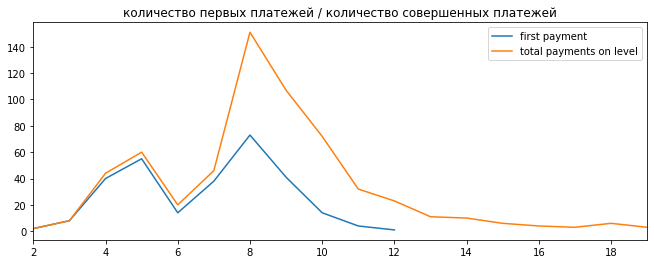

In [111]:
plt.figure(figsize=(11,4))

plt.plot(first_payments_level_count['level'], first_payments_level_count['count'], label='first payment')
plt.plot(max_payment_level['level'], max_payment_level['count'], label='total payments on level')
plt.title('количество первых платежей / количество совершенных платежей')
plt.xlim([2,19])
plt.legend()
plt.show();

<a id="conclusion"> </a>
# Общий вывод:

<b>Общая информация:</b>

В нашем распоряжении было четыре датафрейма:
- датафрейм levels - 130 623 строк,
- датафрейм payments - 699 строк,
- датафрейм sessions - 358 004 строк,
- датафрейм users - 31 114 строк

В каждом из них:
- по 3 столбца,
- пропущенных значений - нет,
- явных и неявных дубликатов - нет.

Период регистрации пользователей - "2023-05-11" - "2023-05-21".

<b>Расчет метрик:</b>

Рассчитав коэффициент удержания, мы выяснили, что в группах от 16 и 18 мая самый высокий процент удержания на 10 день. Эти группы так же хорошо себя показывают себя в плане коэффициента оттока на 10 день.

Причина 0% удержания на 10 день у группы от 21 мая - в датасете нет данных за 31 мая.

Среднее время пребывания в прилолжении - ~ 7 минут.

В имеющихся данных есть аномально длинные сессии (до 1 365 минут), 5% сессий длилось больше 42 минут. Сессий не закрытых в течении того же дня - 2 640.

Возможно, приложение не разлогинивает пользователя автоматически без активности и продолжает работать в фоновом режиме.

Один пользователь в среднем принес нам: 0.72.

Пожизненная ценность клиента - 2.03.

<b>Среднее время, проведенное в приложении; количество платежей:</b>

Посчитав и визуализировав среднее и медианное время пребывания в приложении, мы выяснили, что:
- линии среднего и медианного значения во много похожи,
- до 7 уровня мы наблюдаем рост времени, потом на уровнях 7 - 12 - плато, потом спад.

Предполагаем два варината:
- либо пользователи, столкнувшиеся с трудностями покидают игру и остаются самые сообразительные,
- либо пользователи покупают какой-либо бустер (или подсказки) для более легкого прохождения.

Построив сводную таблицы, мы частично подтвердили первое предположение - начиная с 9 уровня идет спад количества пользователей.

В первые дни после регистрации пользователи совершают больше всего платежей.

Больше всего платежей совершается на 8 и 9 уровнях.

Мы можем соотнести эти данные с графиком времени из шага 2.2: на уровнях 8-10 мы видим плато - пользователи начинают больше времени проводить в приложении. Мы мало знаем об исходных данных (что это за обучающее игровое приложение), но возможно на этих уровнх сложность искуственно завышена и пользователям предлагают купить какой-либо буст для простоты дальнейшего прохождения.

Сводная таблица хорошо коррелируется с предыдущими шагами: первые покупки (так же как и большинство) - совершаются на 8 и 9 уровне.

<a id="recommendations"> </a>
# Рекомендации:

В первую очередь стоит отслеживать:
- ARPPU,
- а так же контролировать расходы на привлечение новых пользователей; в дальнейшем следует следить за cac и roi.

Если рассчитывать расходы на маркетинг, то нам так же понадобится значение бюджета на маркетинг и расчет стоимости одного целевого действия.

Так же нас может интересовать воронка конверсии - нам необходимо знать, сколько пользователей и как взаимодействует с продуктом поэтапно.
Примерная воронка:
- количество кликов -> установок -> регистраций
- количество пользователей, которые прошли первый уровень (у нас нет данных об оплате на первых уровнях, предположим, что он - условно-бесплатный),
- количество пользвотелей, совершивших первую оплату
- и количество пользователей, совершивших повторную оплату.

Так же хочется, чтобы момент оплаты был привязан к уровню, на котором находится пользователь или еще к какому-нибудь дополнительному ключу, чтобы было проще делать выводы.

<div class="alert alert-info"> 
спасибо за ревью.
</div>
